In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
file1 = open('the_windhover.txt', 'r')

lines = 0

for line in file1:
    b = line.strip()
    if b != "" :
        lines += 1
        
# Closing file(s)
file1.close()

In [3]:
file1 = open('the_windhover.txt', 'r')

FSdifference = np.zeros(lines + 1, dtype=float) # a 1x15 array (1 difference in fear and surprise each for 0:14 lines)
TEvec = [0,0]

TBnsr = np.zeros(lines + 1, dtype=float) # a 1x15 array (0:14 lines)
TBpolarity = 0

sid = SentimentIntensityAnalyzer()
Vnsr = np.zeros(lines + 1, dtype=float) # another 1x15 array (0:14 lines)
Vvec = [0,0]

lines = 0

for line in file1:
    b = line.strip()
    TEscore = te.get_emotion(b)
    tb = TextBlob(b)
    v = sid.polarity_scores(b)
    
    if b != '' :
        lines += 1
        
        # average difference between fear and surprise (Text2Emotion)
        TEvec = [TEvec[0] + TEscore['Fear'], TEvec[1] + TEscore['Surprise']]
        FSdifference[lines] = abs((TEvec[1] - TEvec[0]) / lines)
                    
        # net sentiment rate (TextBlob)
        TBpolarity += tb.sentiment.polarity
        TBnsr[lines] = TBpolarity / lines
        
        # net sentiment rate (VADER)
        Vvec = [Vvec[0] + v['neg'], Vvec[1] + v['pos']]
        Vnsr[lines] = (Vvec[1] - Vvec[0]) / lines
    
# Closing file(s)
file1.close()

In [4]:
# normalise the major vectors to get them on the same scale
FSdifference = FSdifference / np.sqrt(np.sum(FSdifference**2))
TBnsr = TBnsr / np.sqrt(np.sum(TBnsr**2))
Vnsr = Vnsr / np.sqrt(np.sum(Vnsr**2))

In [6]:
avgnsr = (TBnsr + Vnsr) / 2 # average NSR between sentiment analysis tools

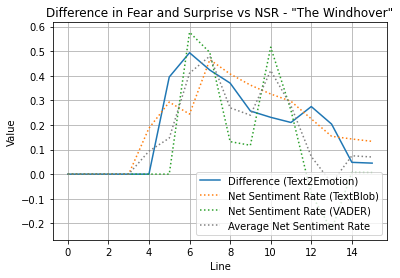

In [9]:
plt.plot(FSdifference, label = 'Difference (Text2Emotion)')
plt.plot(TBnsr, label = 'Net Sentiment Rate (TextBlob)', linestyle='dotted')
plt.plot(Vnsr, label = 'Net Sentiment Rate (VADER)', linestyle='dotted')
plt.plot(avgnsr, label = 'Average Net Sentiment Rate', linestyle='dotted', color = 'grey')
plt.title('Difference in Fear and Surprise vs NSR - "The Windhover"')
plt.xlabel('Line')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()